## Observations and Insights

OBSERVATION 1:  Based off the boxplot illustration, I would determine that Ramicane is the best drug regimen in this situation. Capomilane would be a close second in my opinion, but the mice that were prescribed Ramicane acheived the smallest tumor size.

OBSERVATION 2:  Looking at the scatter plot and linear regression model, weight and tumor size are positively correlated.  Therefore, heavier mice have bigger tumors.

OBSERVATION 3:  Considering observation 2, one place where out data may fall short are the different weight of mice that were given each drug.  We would have to make sure that the weights of all mice in each experimental group are relatively similar since we know now that tumor size and weight are positively correlated.  Another data point we may have wanted to calculate is the range of tumor size for each mouse (starting size-end size).  This would help determine which drug worked best in reducing the tumor size.

## Dependencies and starter code

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
pymaceuticals_data = pd.merge(mouse_metadata, study_results, how="outer", on=["Mouse ID"])
pymaceuticals_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Mean
regimentumormean = pymaceuticals_data.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]


# Median
regimentumormed = pymaceuticals_data.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]

# Variance
regimentumorvar = pymaceuticals_data.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]

#Standard Deviation
regimentumorsdev = pymaceuticals_data.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]

#SEM
regimentumorsem = pymaceuticals_data.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]

#Create a dataframe to hold the above results
summarystatistics={"Tumor Volume Mean":regimentumormean, "Tumor Volume Median":regimentumormed,
                    "Tumor Volume Variance":regimentumorvar,"Tumor Volume Standard Deviation":regimentumorsdev,
                    "Tumor Volume Standard Error of Mean":regimentumorsem}

summarystatistics_df=pd.DataFrame(summarystatistics)
summarystatistics_df

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error of Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

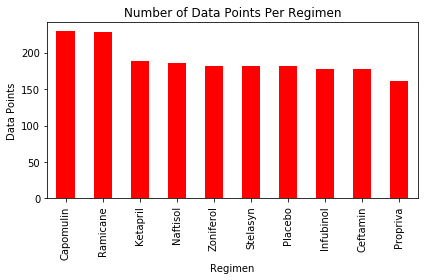

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

regimen_count=pymaceuticals_data["Drug Regimen"].value_counts()

regimen_count.plot(kind="bar", facecolor="red", title="Number of Data Points Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Data Points")
plt.tight_layout()

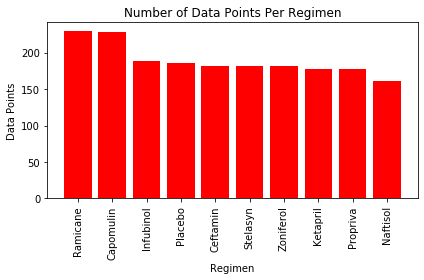

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

regimen_count=pymaceuticals_data["Drug Regimen"].value_counts()
regimen_name=pymaceuticals_data["Drug Regimen"].unique()

plt.bar(regimen_name, regimen_count, color='r', align="center")

plt.xticks(rotation="vertical")

plt.title("Number of Data Points Per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Data Points")

plt.tight_layout()

## Pie plots

(-1.1027130801595115,
 1.105172849624489,
 -1.1045613723658971,
 1.1002172082078998)

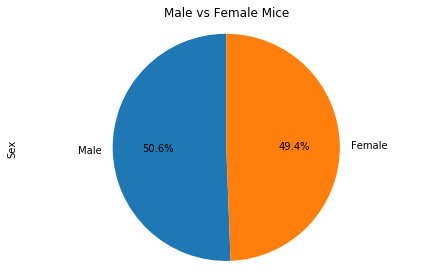

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_count=pymaceuticals_data["Sex"].value_counts()
gender_list = gender_count.keys()

gender_count.plot(kind="pie", y=gender_list, autopct='%1.1f%%', title=("Male vs Female Mice"), startangle=90)

plt.tight_layout()
plt.axis("equal")

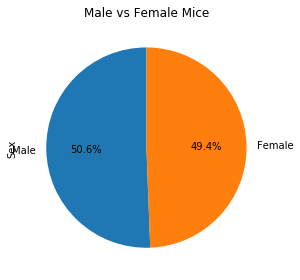

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

pymaceuticals_data["Sex"].value_counts()

explode = (0,0)

plt.pie(gender_count, explode=explode, labels=gender_list, autopct='%1.1f%%', startangle=90)

plt.title("Male vs Female Mice")
plt.ylabel('Sex')
plt.tight_layout()

## Quartiles, outliers and boxplots

In [7]:
#create variables for 4 drug regimens we want
cap_data = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Capomulin"]
ram_data = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Ramicane"]
inf_data = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Infubinol"]
ceft_data = pymaceuticals_data.loc[pymaceuticals_data["Drug Regimen"] == "Ceftamin"]

In [8]:
#CAPOMULIN - Calculate the final tumor volume of each mouse
cap_final = cap_data.groupby('Mouse ID').max()['Timepoint']
cap_final_volume = pd.DataFrame(cap_final)
cap_final_data = pd.merge(cap_final_volume, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")

#RAMICANE - Calculate the final tumor volume of each mouse
ram_final = ram_data.groupby('Mouse ID').max()['Timepoint']
ram_final_volume = pd.DataFrame(ram_final)
ram_final_data = pd.merge(ram_final_volume, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")

#INFUBINOL - Calculate the final tumor volume of each mouse
inf_final = inf_data.groupby('Mouse ID').max()['Timepoint']
inf_final_volume = pd.DataFrame(inf_final)
inf_final_data = pd.merge(inf_final_volume, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")

#CEFTAMIN - Calculate the final tumor volume of each mouse
ceft_final = ceft_data.groupby('Mouse ID').max()['Timepoint']
ceft_final_volume = pd.DataFrame(ceft_final)
ceft_final_data = pd.merge(ceft_final_volume, pymaceuticals_data, on=("Mouse ID","Timepoint"),how="left")

In [9]:
cap_final_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [10]:
ram_final_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [11]:
inf_final_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [12]:
ceft_final_data.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [14]:
#CAPOMULIN -Calculate the IQR and quantitatively determine if there are any potential outliers
cap_quartiles = cap_final_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq

cap_lower_bound = cap_lowerq - (1.5*cap_iqr)
cap_upper_bound = cap_upperq + (1.5*cap_iqr)
print(f"Capomulin potential outliers could be values below {cap_lower_bound} and above {cap_upper_bound} could be outliers.")

#RAMICANE -Calculate the IQR and quantitatively determine if there are any potential outliers
ram_quartiles = ram_final_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq

ram_lower_bound = ram_lowerq - (1.5*ram_iqr)
ram_upper_bound = ram_upperq + (1.5*ram_iqr)
print(f"Ramicane potential outliers could be values below {ram_lower_bound} and above {ram_upper_bound} could be outliers.")

#INFUBINOL -Calculate the IQR and quantitatively determine if there are any potential outliers
inf_quartiles = inf_final_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq

inf_lower_bound = inf_lowerq - (1.5*inf_iqr)
inf_upper_bound = inf_upperq + (1.5*inf_iqr)
print(f"Infubol potential outliers could be values below {inf_lower_bound} and above {inf_upper_bound} could be outliers.")

#CEFTAMIN -Calculate the IQR and quantitatively determine if there are any potential outliers
ceft_quartiles = ceft_final_data["Tumor Volume (mm3)"].quantile([.25,.5,.75])
ceft_lowerq = ceft_quartiles[0.25]
ceft_upperq = ceft_quartiles[0.75]
ceft_iqr = ceft_upperq - ceft_lowerq

ceft_lower_bound = ceft_lowerq - (1.5*ceft_iqr)
ceft_upper_bound = ceft_upperq + (1.5*ceft_iqr)
print(f"Ceftamin potential outliers could be values below {ceft_lower_bound} and above {ceft_upper_bound} could be outliers.")


Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549 could be outliers.
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135 could be outliers.
Infubol potential outliers could be values below 36.83290494999999 and above 82.74144559000001 could be outliers.
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999 could be outliers.


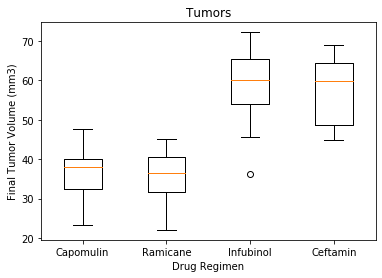

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
boxplot_data=[cap_final_data["Tumor Volume (mm3)"],ram_final_data["Tumor Volume (mm3)"],
        inf_final_data["Tumor Volume (mm3)"],ceft_final_data["Tumor Volume (mm3)"]]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumors')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')

ax1.boxplot(boxplot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

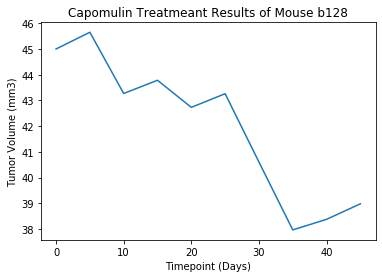

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

#Pick Mouse
singlecapmouse_data=cap_data.loc[cap_data["Mouse ID"] == "b128"]

#Generate line
x_axis = singlecapmouse_data["Timepoint"]
mousetumorvolume = singlecapmouse_data["Tumor Volume (mm3)"]


plt.title('Capomulin Treatmeant Results of Mouse b128')
plt.plot(x_axis, mousetumorvolume)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

Text(0, 0.5, 'Average Tumor Volume (mm3)')

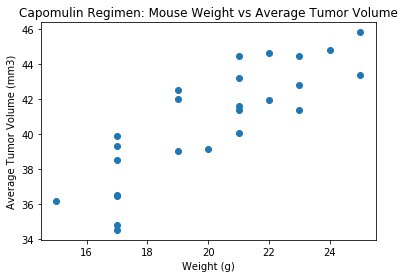

In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

capavgvolume_data = cap_data.groupby(['Mouse ID']).mean()
plt.scatter(capavgvolume_data['Weight (g)'],capavgvolume_data['Tumor Volume (mm3)'])
plt.title("Capomulin Regimen: Mouse Weight vs Average Tumor Volume")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

The correlation between mouse weight and average tumor volume is 0.84


Text(0, 0.5, 'Average Tumore Volume (mm3)')

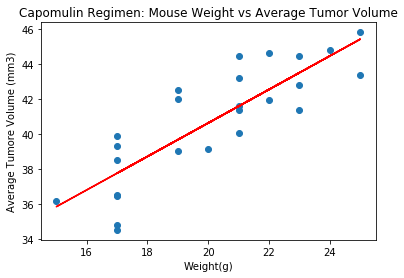

In [18]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
corr=round(st.pearsonr(capavgvolume_data['Weight (g)'],capavgvolume_data['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corr}")

# Calculate the linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr)=st.linregress(capavgvolume_data['Weight (g)'],capavgvolume_data['Tumor Volume (mm3)'])
y_values = capavgvolume_data['Weight (g)']*slope+intercept

# Plot the regression
plt.scatter(capavgvolume_data['Weight (g)'],capavgvolume_data['Tumor Volume (mm3)'])
plt.plot(capavgvolume_data['Weight (g)'],y_values,color="red")
plt.title("Capomulin Regimen: Mouse Weight vs Average Tumor Volume")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumore Volume (mm3)')